In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
pd.set_option('max_rows', 5)

## 考えてみる
---
時系列のデータを視覚的に表現するにはどのような手法が適しているか考えてみる。

## GUIで実行してみる
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- `データ` -> `データのインポート` -> `テキストファイルまたはクリップボード, URLから`

として、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。

`workspace/data/economics.csv`を読み込む。  
`データセットを表示`をクリックし、内容を確認。

- `データ` -> `アクティブデータセット内の変数の管理` -> `データセットに観測値番号を追加`

として、再度データセットを確認。

- `データ` -> `アクティブデータセット` -> `アクティブデータセットの部分集合を抽出`

として、`部分集合の表現`を`ObsNumber < 11`にし、`OK`をクリックし、再度データセットを確認。

- `グラフ` -> `折れ線グラフ`

として、`x変数`に`ObsNumber`、`y変数`に`psavert`を選択し、`OK`をクリックし、折れ線グラフを表示。

## 折れ線グラフ
---
横軸に時間、縦軸に数量をとって、隣り合う時間の数量同士を結んだグラフ。  
時間の経過などによる連続的な変化を確認するのに利用する。

economics


,date,uempmed
0,1967-07-01,4.5
1,1967-08-01,4.7
...,...,...
572,2015-03-01,12.2
573,2015-04-01,11.7


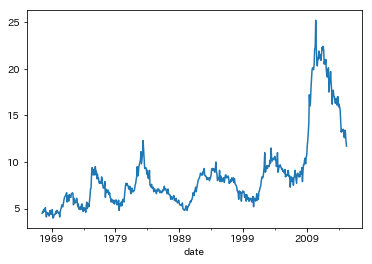

In [2]:
economics = pd.read_csv('data/economics.csv', parse_dates=[0])
print('economics')
display(economics[['date', 'uempmed']])
economics.plot('date', 'uempmed', legend=False)
plt.show()

### Pythonでの折れ線グラフ表示
---
`seaborn.lineplot`、`pandas.DataFrame.plot`、`matplotlib.pyplot.plot`などを用いる。

In [3]:
print('economics')
display(economics)

economics


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
...,...,...,...,...,...,...
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


In [4]:
sns.lineplot??

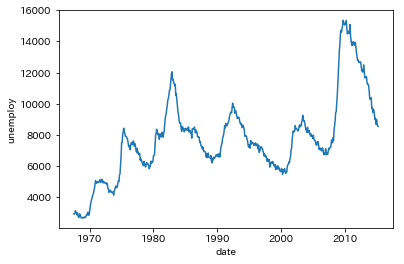

In [5]:
sns.lineplot('date', 'unemploy', data=economics)
plt.show()

In [6]:
pd.DataFrame.plot??

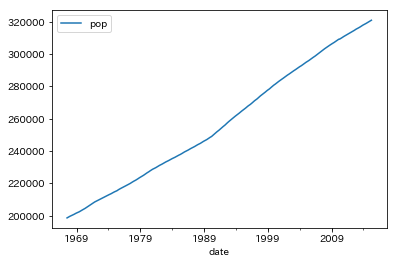

In [7]:
economics.plot('date', 'pop')
plt.show()

In [8]:
plt.plot??

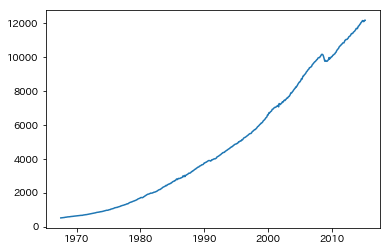

In [9]:
plt.plot('date', 'pce', data=economics)
plt.show()

###### 練習問題

economicsデータセットの`psavert`列を折れ線グラフで表示する。

In [10]:
print('economics')
display(economics)

economics


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
...,...,...,...,...,...,...
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


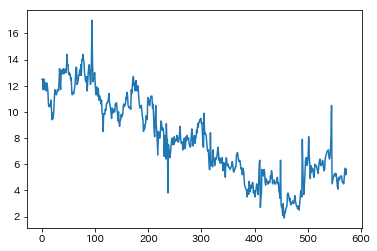

In [11]:
economics['psavert'].plot()
plt.show()

## 複数系列グラフ
---
同じ時間軸上に表示された複数の変数のグラフ。

inflation


,CPIAUCSL,CPILFESL
DATE,,
2008-01-01,212.174,213.771
2008-02-01,212.687,213.939
...,...,...
2017-11-01,247.411,253.791
2017-12-01,247.910,254.398


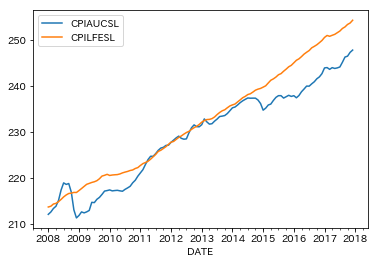

In [12]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2017, 12, 31)
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
print('inflation')
display(inflation)
inflation.plot()
plt.show()

### Pythonでの複数系列グラフ表示
---
`seaborn.lineplot`、`pandas.DataFrame.plot`、`matplotlib.pyplot.plot`などを用いる。

In [13]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31)
google = web.DataReader('GOOGL', 'iex', start, end)['close']
apple = web.DataReader('AAPL', 'iex', start, end)['close']
facebook = web.DataReader('FB', 'iex', start, end)['close']
amazon = web.DataReader('AMZN', 'iex', start, end)['close']
stocks = pd.DataFrame(dict(Google=google, Apple=apple, Facebook=facebook, Amazon=amazon))
print('stocks')
display(stocks)

stocks


,Google,Apple,Facebook,Amazon
date,,,,
2018-01-02,1073.21,169.7120,181.42,1189.01
2018-01-03,1091.52,169.6825,184.67,1204.20
...,...,...,...,...
2018-12-28,1046.68,156.2300,133.20,1478.02
2018-12-31,1044.96,157.7400,131.09,1501.97


In [14]:
sns.lineplot??

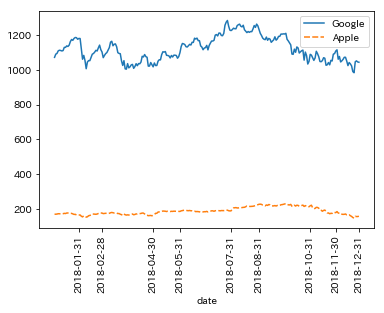

In [15]:
sns.lineplot(data=stocks[['Google', 'Apple']])
monthly = pd.date_range(stocks.index[0], stocks.index[-1], freq='M')
xticks = [i for i, d in enumerate(stocks.index) if d in monthly]
xticklabels = stocks.index[xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.show()

In [16]:
pd.DataFrame.plot??

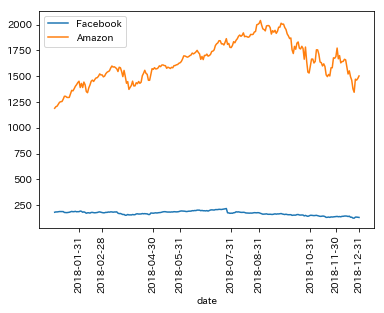

In [17]:
stocks[['Facebook', 'Amazon']].plot(xticks=xticks)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
plt.plot??

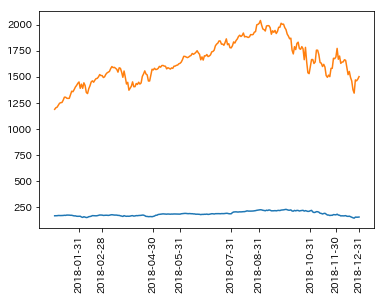

In [19]:
plt.plot(stocks.index, stocks[['Apple', 'Amazon']])
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.show()

###### 練習問題

economicsデータセットの`psavert`列と`uempmed`列を折れ線グラフで表示する。

In [20]:
print('economics')
display(economics)

economics


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
...,...,...,...,...,...,...
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


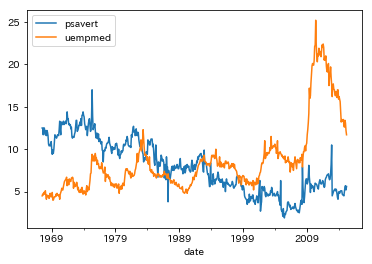

In [21]:
economics.plot('date', ['psavert', 'uempmed'])
plt.show()